# **Regularization and the bias-variance trade-off**

**Overfitting** is a constant danger with machine learning models. Overfit models fit the training data well. However, an overfit model will not **generalize**. A model that generalizes is a model which exhibits good performance on data cases beyond the ones used in training. Models that generalize will be useful in production. 

As a general rule, an overfit model has learned the training data too well. The overfitting likely involved learning noise present in the training data. The noise in the data is random and uninformative. When a new data case is presented to such a model it may produce unexpected results since the random noise will be different. 

So, what is one to do to prevent overfitting of machine learning models? The most widely used set of tools for preventing overfitting are known as **regularization methods**. Regularization methods take a number of forms, but all have the same goal, to prevent overfitting of machine learning models. 

Regularization is not free however. While regularization reduces the **variance** in the model results, it introduces **bias**. Whereas, an overfit model exhibits low bias the variance is high. The high variance leads to unpredictable results when the model is exposed to new data cases. On the other hand, the stronger the regularization of a model the lower the variance, but the greater the bias. This all means that when applying regularization you will need to contend with the **bias-variance trade-off**. 

To better understand the bias variance trade-off consider the following examples of extreme model cases:

- If the prediction for all cases is just the mean (or median), variance is minimized. The estimate for all cases is the same, so the bias of the estimates is zero. However, there is likely considerable variance in these estimates. 
- On the other hand, consider what happens when the data are fit with a kNN model with k=1. The training data will fit this model perfectly, since there is one model coefficient per training data point. The variance will be low. However, the model will have considerable bias when applied to test data. 

In either case, these extreme models will not generalize well and will exhibit large errors on any independent test data. Any practical model must come to terms with the trade-off between bias and variance to make accurate predictions. 

To better understand this trade-off you can consider the example of the mean square error, which can be decomposed into its components. The mean square error can be written as:

$$\Delta x = E \Big[ \big(Y - \hat{f}(X) \big)^2 \Big] = \frac{1}{N} \sum_{i=1}^N \big(y_i - \hat{f}(x_i) \big)^2 $$

Where,
$Y = $ the label vector.  
$X = $ the feature matrix.   
$\hat{f}(x) = $ the trained model.   

Expanding the representation of the mean square error:

$$\Delta x = \big( E[ \hat{f}(X)] - \hat{f}(X) \big)^2 + E \big[ ( \hat{f}(X) - E[ \hat{f}(X)])^2 \big] + \sigma^2\\
\Delta x = Bias^2 + Variance + Irreducible\ Error$$

Study this relationship. Notice that as regularization reduces variance, bias increases. The irreducible error will remain unchanged. Regularization parameters are chosen to minimize $\Delta x$. In many cases, this will prove challenging. 

## **Load a  data set**

With the above bit of theory in mind, it is time to try an example. In this example you will compute and compare linear regression models using different levels and types of regularization. 

Execute the code in the cell below to load the packages required for the rest of this notebook.

In [0]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Setting the path
import os
os.chdir("/content/drive/My Drive/Introduction to Data Science - Python edition/Module4/dataset")

In [0]:
# Importing libraries
import numpy as np
import pandas as pd
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

The data are available in a pre-processed form. The preprocessing includes the following:

 1. Cleaning missing values.
 2. Aggregate categories of certain categorical variables.
 3. Encoding categorical variables as binary dummy variables.
 4. Standardization of numeric variables.

Execute the code in the cell below to load the features and labels.

In [0]:
X_train = pd.read_csv("houseprice_X_train.csv")
X_validation = pd.read_csv("houseprice_X_validation.csv")
X_test = pd.read_csv("houseprice_X_test.csv")

y_train = np.array(pd.read_csv("houseprice_y_train.csv", header=None))
y_validation = np.array(pd.read_csv("houseprice_y_validation.csv", header=None))
y_test = np.array(pd.read_csv("houseprice_y_test.csv", header=None))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[11.31637435]
[[ 1.82488965  0.78589483  0.2340364   0.01709676 -0.25113316]]
Mean Square Error      = 0.05583821903465894
Root Mean Square Error = 0.23630111941050752
Mean Absolute Error    = 0.17858340200899758
Median Absolute Error  = 0.14203466799539122
R^2                    = 0.6334650556892025


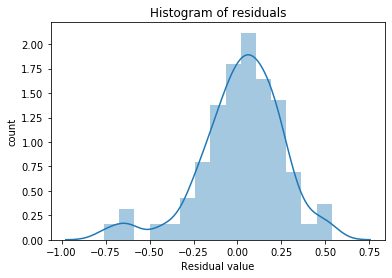

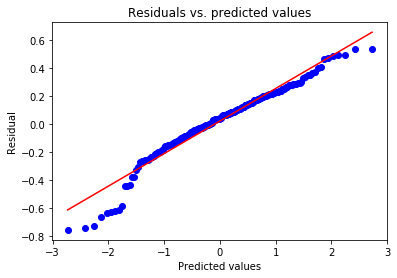

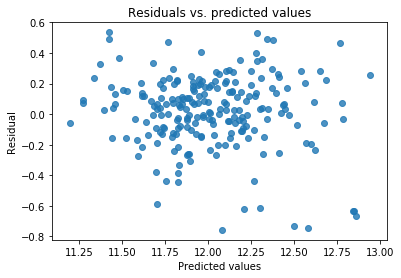

In [0]:
## define and fit the linear regression model
from sklearn.linear_model import LinearRegression
lin_mod = LinearRegression()
lin_mod = lin_mod.fit(X_train, y_train)
print(lin_mod)

def print_metrics(y_true, y_predicted):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()

def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    plt.show()
    
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, y_score)
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()
  

y_score = lin_mod.predict(X_validation)
print(lin_mod.intercept_)
print(lin_mod.coef_)
print_metrics(y_validation, y_score) 
hist_resids(y_validation, y_score)  
resid_qq(y_validation, y_score) 
resid_plot(y_validation, y_score)

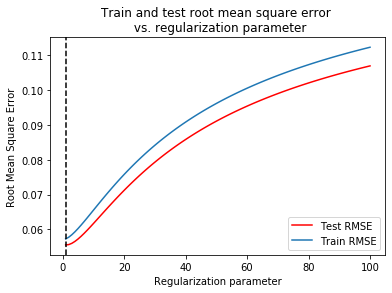

ValueError: ignored

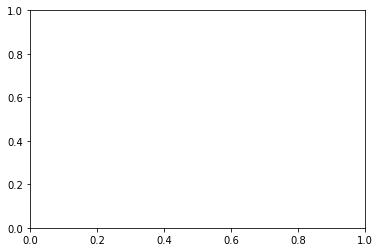

In [0]:
def plot_regularization(l, train_RMSE, test_RMSE, coefs, min_idx, title):   
    plt.plot(l, test_RMSE, color = 'red', label = 'Test RMSE')
    plt.plot(l, train_RMSE, label = 'Train RMSE')    
    plt.axvline(min_idx, color = 'black', linestyle = '--')
    plt.legend()
    plt.xlabel('Regularization parameter')
    plt.ylabel('Root Mean Square Error')
    plt.title(title)
    plt.show()
    
    plt.plot(l, coefs)
    plt.axvline(min_idx, color = 'black', linestyle = '--')
    plt.title('Model coefficient values \n vs. regularizaton parameter')
    plt.xlabel('Regularization parameter')
    plt.ylabel('Model coefficient value')
    plt.show()

def test_regularization_l2(x_train, y_train, x_test, y_test, l2):
    train_RMSE = []
    test_RMSE = []
    coefs = []
    for reg in l2:
        lin_mod = linear_model.Ridge(alpha = reg)
        lin_mod.fit(x_train, y_train)
        coefs.append(lin_mod.coef_)
        y_score_train = lin_mod.predict(x_train)
        train_RMSE.append(sklm.mean_squared_error(y_train, y_score_train))
        y_score = lin_mod.predict(x_test)
        test_RMSE.append(sklm.mean_squared_error(y_test, y_score))
    min_idx = np.argmin(test_RMSE)
    min_l2 = l2[min_idx]
    min_RMSE = test_RMSE[min_idx]
    
    title = 'Train and test root mean square error \n vs. regularization parameter'
    plot_regularization(l2, train_RMSE, test_RMSE, coefs, min_l2, title)
    return min_l2, min_RMSE
     
l2 = [x for x in range(1,11)]
min_l2, min_RMSE = test_regularization_l2(X_train, y_train, X_validation, y_validation, l2)